#### 42/44. Good job

In [54]:
#conda v 22.9.0
#Python v 3.9.12
import numpy as np # v. 1.21.5
import sklearn # v. 0.0
import pandas as pd # v. 1.4.2
import ydata_profiling as ypp #v. 4.5.1
import matplotlib.pyplot as plt # v. 3.5.1
import statsmodels.api as sm # v. 0.13.2
import pandas as pd #v. 1.4.2
import pmdarima as pm #v. 2.0.3
import sweetviz as sv #v. 2.2.1
import warnings as ww 
import statsmodels.tsa.stattools as stattools # v. 0.13.2
import seaborn as sns

from statsmodels.tsa.stattools import adfuller # v. 0.13.2
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v. 0.13.2
from statsmodels.tsa.arima_model import ARIMA # v. 0.13.2

from sklearn.model_selection import train_test_split # v. 0.0
from sklearn.metrics import mean_absolute_error # v. 0.0
from sklearn.metrics import mean_squared_error # v. 0.0
from sklearn.metrics import mean_absolute_percentage_error # v. 0.0
from sklearn.linear_model import LogisticRegression # v. 0.0
from sklearn.metrics import accuracy_score, precision_score, recall_score # v. 0.0
from sklearn.metrics import confusion_matrix # v. 0.0
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # v. 0.0
from sklearn.metrics import roc_auc_score, roc_curve # v. 0.0
from sklearn.preprocessing import LabelBinarizer # v. 0.0

ww.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/colejennings/Downloads/loan_default_data_set.csv')

In [3]:
df.head()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
0,102956.1101,14819.05740,238,104,264,0,0,0,0.0,0,...,1,0,0.366737,0.342183,0.513934,0.550866,0,118266.32130,college,0
1,132758.7258,18951.93455,384,197,371,0,0,0,0.0,0,...,0,0,0.490809,0.540671,0.418016,NaN,0,89365.05765,college,0
2,124658.9174,15347.92969,277,110,288,0,0,0,0.0,0,...,0,0,0.359074,0.338560,0.341627,0.451417,0,201365.12130,college,0
3,133968.5369,14050.71334,375,224,343,0,0,0,0.0,2,...,1,0,0.700379,0.683589,0.542940,0.607843,0,191794.48550,college,0
4,143601.8017,14858.51527,374,155,278,0,0,0,0.0,0,...,0,0,0.647351,0.510812,0.632934,0.573680,0,161465.36790,graduate,0


In [4]:
df.columns, df.shape, df.dtypes #20,000 rows, 21 columns

(Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
        'credit_card_age', 'num_acc_30d_past_due_12_months',
        'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
        'tot_amount_currently_past_due', 'num_inq_12_month',
        'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
        'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
        'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'rep_education',
        'Def_ind'],
       dtype='object'),
 (20000, 21),
 tot_balance                        float64
 avg_bal_cards                      float64
 credit_age                           int64
 credit_age_good_account              int64
 credit_card_age                      int64
 num_acc_30d_past_due_12_months       int64
 num_acc_30d_past_due_6_months        int64
 num_mortgage_currently_past_due      int64
 tot_amount_currently_past_due      float64
 num_inq_12_month                     int64
 num_c

In [5]:
df.isna().sum() #pct_card_over_50_uti = 1958 missing values, rep_income = 1559 missing values, rep_education = 1 missing value

tot_balance                           0
avg_bal_cards                         0
credit_age                            0
credit_age_good_account               0
credit_card_age                       0
num_acc_30d_past_due_12_months        0
num_acc_30d_past_due_6_months         0
num_mortgage_currently_past_due       0
tot_amount_currently_past_due         0
num_inq_12_month                      0
num_card_inq_24_month                 0
num_card_12_month                     0
num_auto_ 36_month                    0
uti_open_card                         0
pct_over_50_uti                       0
uti_max_credit_line                   0
pct_card_over_50_uti               1958
ind_XYZ                               0
rep_income                         1559
rep_education                         1
Def_ind                               0
dtype: int64

In [6]:
df['rep_education'].value_counts()
#replace nulls with "college" since it is the mode of rep_education
df['rep_education'].fillna('college', inplace=True)

In [7]:
# Calculate the median 
median_pct_card_over_50_uti = df['pct_card_over_50_uti'].median()
median_rep_income = df['rep_income'].median()


# Replace null values with the respective medians
df['pct_card_over_50_uti'].fillna(median_pct_card_over_50_uti, inplace=True)
df['rep_income'].fillna(median_rep_income, inplace=True)

In [8]:
df.isna().sum() #replaced all null values successfully

tot_balance                        0
avg_bal_cards                      0
credit_age                         0
credit_age_good_account            0
credit_card_age                    0
num_acc_30d_past_due_12_months     0
num_acc_30d_past_due_6_months      0
num_mortgage_currently_past_due    0
tot_amount_currently_past_due      0
num_inq_12_month                   0
num_card_inq_24_month              0
num_card_12_month                  0
num_auto_ 36_month                 0
uti_open_card                      0
pct_over_50_uti                    0
uti_max_credit_line                0
pct_card_over_50_uti               0
ind_XYZ                            0
rep_income                         0
rep_education                      0
Def_ind                            0
dtype: int64

In [9]:
df['rep_education'].value_counts(normalize = True)
#1b. graduate level education is underrepresented in the data as the proportion of graduate level in the data is less than 1/2 the proportion of high school and less than 1/4 the proportion of college

college        0.6069
high_school    0.2657
graduate       0.1203
other          0.0071
Name: rep_education, dtype: float64

In [10]:
df['Def_ind'].value_counts(normalize = True)
#1c. The class of observations that defaulted are underrepresented. The classes are not balanced.

0    0.9
1    0.1
Name: Def_ind, dtype: float64

<AxesSubplot:xlabel='rep_income', ylabel='Density'>

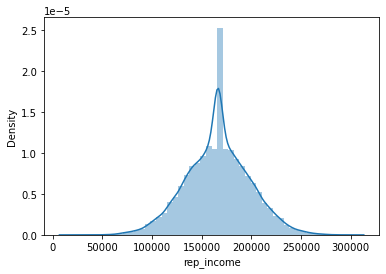

In [11]:
sns.distplot(df['rep_income'])
#1d. rep_income is approximately normally distributed

In [12]:
df.groupby('rep_education')['Def_ind'].value_counts(normalize=True)
#1e. High School or below education level is most likely to default on their loan (11.57% likely)

rep_education  Def_ind
college        0          0.903032
               1          0.096968
graduate       0          0.918121
               1          0.081879
high_school    0          0.884268
               1          0.115732
other          0          0.922535
               1          0.077465
Name: Def_ind, dtype: float64

In [13]:
report = sv.analyze(df)

                                             |      | [  0%]   00:00 -> (? left)

In [14]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [15]:
#Have to convert rep_education into binary variables
df = pd.get_dummies(df, columns=['rep_education'], prefix=['education'])

In [16]:
df.columns

Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
       'credit_card_age', 'num_acc_30d_past_due_12_months',
       'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
       'tot_amount_currently_past_due', 'num_inq_12_month',
       'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
       'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
       'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'Def_ind',
       'education_college', 'education_graduate', 'education_high_school',
       'education_other'],
      dtype='object')

In [17]:
df.head()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,Def_ind,education_college,education_graduate,education_high_school,education_other
0,102956.1101,14819.05740,238,104,264,0,0,0,0.0,0,...,0.342183,0.513934,0.550866,0,118266.32130,0,1,0,0,0
1,132758.7258,18951.93455,384,197,371,0,0,0,0.0,0,...,0.540671,0.418016,0.551765,0,89365.05765,0,1,0,0,0
2,124658.9174,15347.92969,277,110,288,0,0,0,0.0,0,...,0.338560,0.341627,0.451417,0,201365.12130,0,1,0,0,0
3,133968.5369,14050.71334,375,224,343,0,0,0,0.0,2,...,0.683589,0.542940,0.607843,0,191794.48550,0,1,0,0,0
4,143601.8017,14858.51527,374,155,278,0,0,0,0.0,0,...,0.510812,0.632934,0.573680,0,161465.36790,0,0,1,0,0


In [18]:
#1f. There appears to be multicollinearity between variables. For example num_card_inq_24_month has a 0.91 correlation ratio with num_inq_12_month
# suggesting there might be multicollinearity

In [19]:
y = df["Def_ind"]

In [20]:
X = df.loc[:, df.columns != "Def_ind"] # I want all columns except the Def_ind column which is the response variable

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) #split data into training and yest sets

In [46]:
model = LogisticRegression(solver = 'saga', max_iter = 10000) #solver specifies the optimization algorithm, solver is good for large datasets
#max_iter determines how long the optimization algorithm will run. These two parameters solve for the error "underlow encountered in matmul"
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [49]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
#weighted average takes into account class distribution in the dataset
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9048333333333334
Precision: 0.8889905685377018
Recall: 0.9048333333333334


In [50]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confusion)

Confusion Matrix: [[5378   19]
 [ 552   51]]


In [ ]:
#Interpretation: 
#The model correctly identified 5,378 negative instances (True Negatives).
#The model incorrectly identified 19 positive instances as negative (False Positives).
#The model incorrectly identified 552 positive instances as negative (False Negatives).
#The model correctly identified 51 positive instances (True Positives).
#The model performs reasonably given this as well as 90% accuracy, 89% precision, and 90% recall
# Accuracy provides an overall assessment of how well the model is performing. Precision provides info on accuracy of positive predictions. Recall allows us to capture all relevant instances.
# However, data is unbalanced here so we shouldn't use accuracy to determine model performance

In [63]:
# Obtain preditions for positive class
y_prob = model.predict_proba(X_test)[:, 1]

In [64]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [65]:
# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)

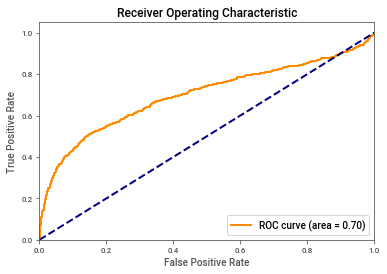

In [66]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
#ROC curve shows results slightly beteer than random

In [61]:
# Get the coefficients
coefficients = model.coef_[0]
feature_names = X_train.columns

In [62]:
# Create a DataFrame to associate feature names with their coefficients
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by coefficient magnitude (absolute value)
feature_coefficients['Abs_Coefficient'] = abs(feature_coefficients['Coefficient'])
feature_coefficients = feature_coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Print or visualize the sorted feature importances
print(feature_coefficients)

#Interpretation: feature importance for logistic regression assumes linear relationship between y and x's
#sign for each respective feature in coefficient column determines if the feature positively or negatively impacts y (Def_ind)
#credit_age has the largest magnitude impact of if someone defaults on a loan or not, the next most important features are credit_card_age and credit_age_good_account

                            Feature   Coefficient  Abs_Coefficient
2                        credit_age -1.767250e-03     1.767250e-03
4                   credit_card_age -1.166789e-03     1.166789e-03
3           credit_age_good_account -6.415602e-04     6.415602e-04
8     tot_amount_currently_past_due  2.528347e-04     2.528347e-04
1                     avg_bal_cards -1.102047e-04     1.102047e-04
10            num_card_inq_24_month  8.132788e-05     8.132788e-05
9                  num_inq_12_month  5.233587e-05     5.233587e-05
5    num_acc_30d_past_due_12_months  1.585558e-05     1.585558e-05
13                    uti_open_card  1.066862e-05     1.066862e-05
16             pct_card_over_50_uti  8.508904e-06     8.508904e-06
15              uti_max_credit_line  8.315702e-06     8.315702e-06
14                  pct_over_50_uti  8.182966e-06     8.182966e-06
17                          ind_XYZ -5.463084e-06     5.463084e-06
21            education_high_school  4.684831e-06     4.684831

In [26]:
df2 = pd.read_csv('/Users/colejennings/Downloads/mobile_phone_prices.csv')

In [27]:
df2.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,int_memory,mobile_depth,mobile_weight,number_of cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [28]:
df2.columns, df2.shape, df2.dtypes

(Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
        'four_g', 'int_memory', 'mobile_depth', 'mobile_weight',
        'number_of cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
        'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
       dtype='object'),
 (2000, 21),
 battery_power        int64
 bluetooth            int64
 clock_speed        float64
 dual_sim             int64
 front_camera         int64
 four_g               int64
 int_memory           int64
 mobile_depth       float64
 mobile_weight        int64
 number_of cores      int64
 pc                   int64
 px_height            int64
 px_width             int64
 ram                  int64
 sc_h                 int64
 sc_w                 int64
 talk_time            int64
 three_g              int64
 touch_screen         int64
 wifi                 int64
 price_range          int64
 dtype: object)

In [29]:
df2.isna().sum()

battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
front_camera       0
four_g             0
int_memory         0
mobile_depth       0
mobile_weight      0
number_of cores    0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [30]:
report2 = sv.analyze(df2)

                                             |      | [  0%]   00:00 -> (? left)

In [31]:
report2.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#sc_w and px_height and both right-skewed. prince_range and ram might experience multicollinearity as they have a correlation ratio of 0.92.

In [33]:
y2 = df2["price_range"]

In [34]:
X2 = df2.loc[:, df2.columns != "price_range"] # I want all columns except the price_range column which is the response variable

#### Explain what the code in the cells below is accomplishing. (-2)

In [35]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=4)

In [37]:
model2 = LinearDiscriminantAnalysis()

In [38]:
model2.fit(X2_train, y2_train)

LinearDiscriminantAnalysis()

In [39]:
y2_pred = model2.predict(X2_test)

In [40]:
model2.coef_

array([[-7.65161169e-03,  2.59792074e-01,  3.26192847e-01,
         4.64856465e-01, -8.95590189e-03,  3.51115212e-01,
        -1.26551451e-02, -5.91325173e-02,  1.42216502e-02,
        -3.53471102e-02,  3.76865625e-05, -4.20010978e-03,
        -4.12743848e-03, -1.39934529e-02, -3.66168078e-02,
        -1.33650901e-02, -4.40457605e-02, -5.74067096e-01,
        -8.67295175e-02,  1.35271752e-01],
       [-2.04697280e-03,  1.85206475e-02,  8.18793541e-02,
         1.66776594e-01, -6.94004767e-03,  1.62234748e-02,
        -5.18561420e-03,  2.87873357e-01,  3.65530738e-03,
        -4.74247317e-02,  7.65983434e-03, -1.00641458e-03,
        -1.18153356e-03, -4.19128433e-03, -1.30009178e-03,
        -1.08356362e-02, -1.86387942e-03, -1.71261604e-01,
         4.13829960e-02,  1.01557652e-01],
       [ 2.05437170e-03, -1.46916259e-01, -1.10545696e-01,
        -2.34661052e-01,  1.55072000e-02, -1.97035163e-01,
         2.04153386e-03, -1.21629106e-01, -1.74650694e-03,
         4.83145041e-02, -2.6

In [45]:
df2['price_range'].value_counts(normalize = True)
#dataset is balanced

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

In [44]:
accuracy2 = accuracy_score(y2_test, y2_pred)
precision2 = precision_score(y2_test, y2_pred, average = 'weighted')
recall2 = recall_score(y2_test, y2_pred, average = 'weighted')
confusion2 = confusion_matrix(y2_test, y2_pred)
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("Confusion Matrix:", confusion2)

Accuracy: 0.9416666666666667
Precision: 0.9437895955183586
Recall: 0.9416666666666667
Confusion Matrix: [[136   6   0   0]
 [  3 144   9   0]
 [  0   8 137   0]
 [  0   0   9 148]]


In [ ]:
#Interpretation of the confusion matrix and other evaluators: The diagonal (136, 144, 137, and 148) are the correctly predicted True Positives for each class.
# The 6 represents fale positives for class 1. The # of TPs is high compared to the incorrectly predicted. Accuracy, recall and precision are all 94% making the model high performing.
# Accuracy provides an overall assessment of how well the model is performing. Precision provides info on accuracy of positive predictions. Recall allows us to capture all relevant instances.
#